## Evaluation of topic extraction and sentiment analysis

### Checking general information

Token indices sequence length is longer than the specified maximum sequence length for this model (821 > 512). Running this sequence through the model will result in indexing errors


count    1000.000000
mean      422.707000
std       187.864926
min        10.000000
25%       363.750000
50%       445.000000
75%       510.000000
max      1158.000000
Name: email_body, dtype: float64


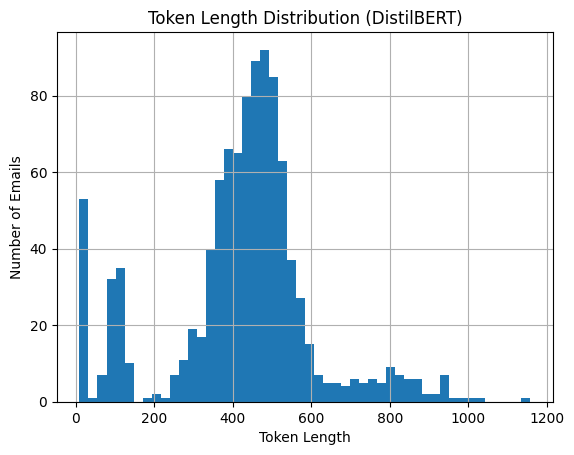

In [4]:
from transformers import DistilBertTokenizer
import pandas as pd
import matplotlib.pyplot as plt

# Load your training data
df = pd.read_csv("../../data/email_dataset_train.csv")

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Compute token lengths
token_lengths = df['email_body'].dropna().apply(lambda x: len(tokenizer.encode(str(x), truncation=False)))

# Print basic stats
print(token_lengths.describe())

# Optional: plot histogram
token_lengths.hist(bins=50)
plt.xlabel("Token Length")
plt.ylabel("Number of Emails")
plt.title("Token Length Distribution (DistilBERT)")
plt.show()

### Topic extraction

Finetuned model on 250 test set.
The purpose is to see if we need to reduce the threshold for classification or not.


### Sentiment Analysis

VADER on the whole 1250 email dataset

In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter, defaultdict

# Load data
df = pd.read_csv("../../data/email_dataset_train.csv")

# VADER setup
analyzer = SentimentIntensityAnalyzer()

def vader_label(text):
    scores = analyzer.polarity_scores(str(text))
    compound = scores['compound']
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Run VADER and compare
results = []
for idx, row in df.iterrows():
    true_sentiment = str(row['sentiment']).strip().capitalize()
    pred_sentiment = vader_label(row['email_body'])
    results.append((true_sentiment, pred_sentiment))

# Overall accuracy
correct = sum(t == p for t, p in results)
total = len(results)
print(f"Overall VADER accuracy: {correct}/{total} = {correct/total:.2%}")

# Breakdown by true sentiment
by_category = defaultdict(lambda: Counter())
for t, p in results:
    by_category[t]['total'] += 1
    if t == p:
        by_category[t]['correct'] += 1

print("\nAccuracy by sentiment category:")
for cat, stats in by_category.items():
    acc = stats['correct'] / stats['total'] if stats['total'] else 0
    print(f"  {cat:10}: {stats['correct']}/{stats['total']} = {acc:.2%}")

Overall VADER accuracy: 185/1000 = 18.50%

Accuracy by sentiment category:
  Very negative: 0/169 = 0.00%
  Neutral   : 4/138 = 2.90%
  Very positive: 0/169 = 0.00%
  Positive  : 159/175 = 90.86%
  Mixed     : 0/179 = 0.00%
  Negative  : 22/170 = 12.94%
